<a href="https://colab.research.google.com/github/Richish/hands_on_ml/blob/master/7_2_ensemble_learning_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting
Boosting (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to **train predictors sequentially**, each trying to correct its predecessor.

2 of the most popular boosting methods:
1. Ada Boost.(Adaptive Boosting)
2. Gradient Boosting.

# Ada Boost

## Technique used by Ada‐Boost:
A new predictor corrects its predecessor by paying a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. 

## Example:
To build an AdaBoost classifier, a first base classifier (such as a DecisionTree or any other classifier) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.

Once all predictors are trained, the ensemble makes predictions very much like bagging
or pasting, except that predictors have different weights depending on their
overall accuracy on the weighted training set.

## Comparison with gradient descent:
This sequential learning technique has some similarities with Gradient Descent, except that instead of tweaking a single predictor’s parameters to minimize a cost function, AdaBoost adds predictors to the ensemble, gradually making it better.

## Drawback of this sequential technique
It cannot be parallelized (or only partially), since each predictor
can only be trained after the previous predictor has been
trained and evaluated. As a result, it does not scale as well as bagging
or pasting.

## Ada Boost algorithm details

i -> ith instance.
j -> jth predictor.
{} -> subscript

w^(i) - > Weight of ith instance(initialised to 1/m for each instance).
These w^(i) ar what needs to be updated in each predictor.

r{j} denoted as r{j} is the weighted error rate of all the instances on jth predictor.

r{j} = (from i=1 to m if ÿ{j}^(i) != y^(i)) Σw^(i)) / ((from i=1 to m)Σw^(i))

Predictor weight, à{j} = ń log((1-r{j})/r{j})
here, ń = learning rate parameter(default = 1).

Next, the instance weights are updated:
w^(i) = w^(i) if ÿ{j}^(i) = y^(i)
w^(i) = w^(i)*exp(à{j})) if ÿ{j}^(i) != y^(i)

Then all the instance weights are normalized (i.e., divided by (from i = 1to m)Σw^(i)).

Finally, a new predictor is trained using the updated weights, and the whole process is repeated (the new predictor’s weight is computed, the instance weights are updated,then another predictor is trained, and so on). The algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found.

To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights α{j}. The predicted class is the one that receives the majority of weighted votes.

## SAMME16 (Stagewise Additive Modeling using a Multiclass Exponential loss function)

Scikit-Learn actually uses a multiclass version of AdaBoost called SAMME16 (which stands for Stagewise Additive Modeling using a Multiclass Exponential loss function). When there are just two classes, SAMME is equivalent to AdaBoost. Moreover, if the predictors can estimate class probabilities (i.e., if they have a predict_proba() method), Scikit-Learn can use a variant of SAMME called SAMME.R (the R stands for “Real”), which relies on class probabilities rather than predictions and generally performs better.



## Example in sklearn:
The following code trains an AdaBoost classifier based on 200 Decision Stumps using Scikit-Learn’s AdaBoostClassifier class (as you might expect, there is also an Ada BoostRegressor class). A Decision Stump is a Decision Tree with max_depth=1—in other words, a tree composed of a single decision node plus two leaf nodes. This is the default base estimator for the AdaBoostClassifier class.

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=10_000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, algorithm="SAMME.R", random_state=42
)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.861

## Hyperpamater tuning
If your AdaBoost ensemble is overfitting the training set, you can
try reducing the number of estimators or more strongly regularizing
the base estimator.

# Gradient boosting(Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT))

Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor.

But, Instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.



## Basic implementation of GBRT using decision trees.

In [14]:
# data prep for quadratic dataset for regression
import numpy as np
m=100
X=6*np.random.rand(m,1)-3
y=0.5*(X**2) + (X) + (2 + np.random.randn(m, 1))


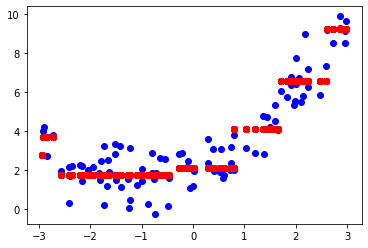

In [15]:
# First, let’s fit a DecisionTreeRegressor to the training set:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

# Now train a second DecisionTreeRegressor on the residual errors made by the first predictor:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

# Then we train a third regressor on the residual errors made by the second predictor:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

# Now we have an ensemble containing three trees. It can make predictions on a new
# instance simply by adding up the predictions of all the trees:
y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

# plot values
import matplotlib.pyplot as plt
plt.plot(X, y, 'bo')
plt.plot(X, y_pred, 'ro')
plt.show()

## Direct use of GBRT using sklearn's GradientBoostingRegressor

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


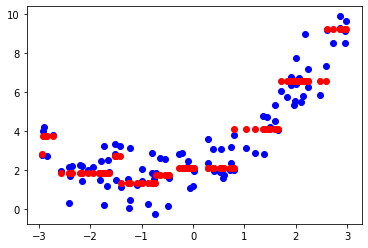

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)
y_pred = gbrt.predict(X)

# plot values
import matplotlib.pyplot as plt
plt.plot(X, y, 'bo')
plt.plot(X, y_pred, 'ro')
plt.show()